### **Solving the 1D diffusion equation via RK4**
**5/14**
First crack at RK4 methods to solve our test case. See research notebook. Equation:
$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$
Initial Conditions:
$$u = \sin(\pi x)$$
Solution:
$$u(x, t) = e^{-D\pi^2 t} \sin(\pi x)$$

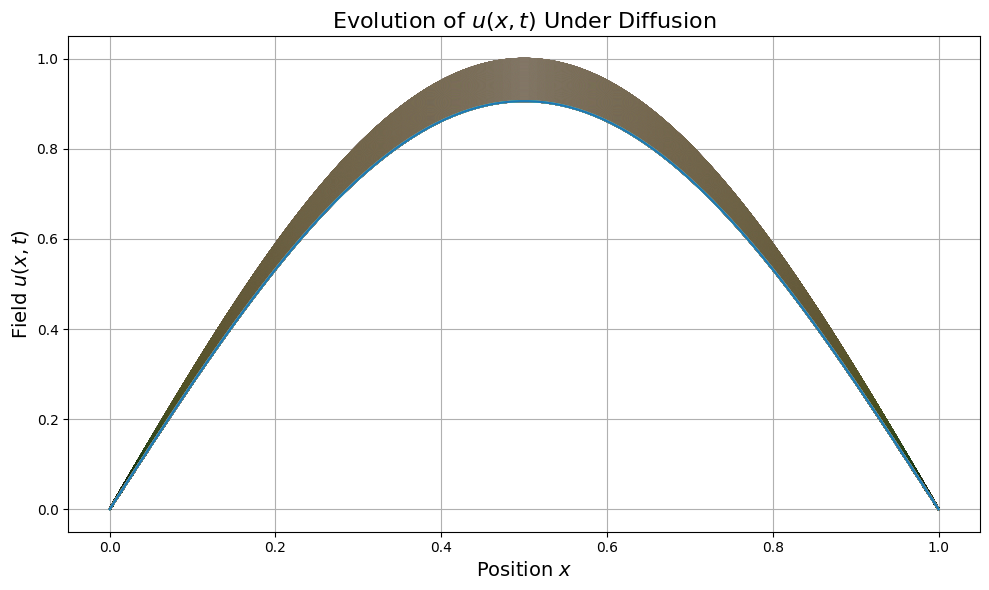

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Domain parameters
L = 1.0                     # Length of the domain
N = 100                     # Number of grid points
dx = L / (N - 1)            # Grid spacing
x = np.linspace(0, L, N)    # Grid points

# Time parameters
D = 0.1                     # Diffusion coefficient
dt = 0.00001                # Time step
T = 0.1                     # Total time
steps = int(T / dt)         # Number of time steps

# Initial condition: sin(pi * x)
u = np.sin(np.pi * x)

# Enforce Dirichlet boundary conditions
u[0]  = 0
u[-1] = 0

# Right-hand side function
def compute_rhs(u, D, dx):
    dudt = np.zeros_like(u)

    for i in range(1, len(u) - 1):
        dudt[i] = D * (u[i + 1] - 2 * u[i] + u[i - 1]) / (dx ** 2)
    
    return dudt

# RK4 time-stepping
def rk4_step(u, D, dx, dt):
    k1 = compute_rhs(u, D, dx)
    k2 = compute_rhs(u + 0.5 * dt * k1, D, dx)
    k3 = compute_rhs(u + 0.5 * dt * k2, D, dx)
    k4 = compute_rhs(u + dt * k3, D, dx)

    u_new = u + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    u_new[0]  = 0
    u_new[-1] = 0
    
    return u_new

# Store the solution at each time step for plotting purposes
u_history = [u.copy()]

# Simulation loop
for step in range(steps):
    u = rk4_step(u, D, dx, dt)
    u_history.append(u.copy())

plt.figure(figsize=(10, 6))
for i, u_snap in enumerate(u_history):
    plt.plot(x, u_snap, label=f't={i*dt:.5f}')

plt.xlabel('Position $x$', fontsize=14)
plt.ylabel('Field $u(x, t)$', fontsize=14)
plt.title('Evolution of $u(x, t)$ Under Diffusion', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


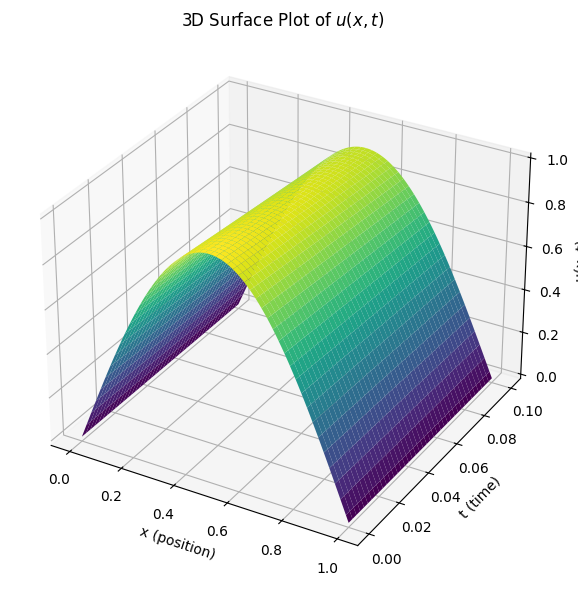

In [2]:
# === 3D Surface Plot ===
# Downsample for performance
skip = len(u_history) // 200 or 1
U = np.array(u_history[::skip])
T = np.linspace(0, T, len(U))
X, T_grid = np.meshgrid(x, T)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, T_grid, U, cmap='viridis')

ax.set_xlabel('x (position)')
ax.set_ylabel('t (time)')
ax.set_zlabel('u(x, t)')
ax.set_title('3D Surface Plot of $u(x, t)$')

plt.tight_layout()
plt.show()